In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
%matplotlib inline

In [2]:
G = 1
dt = 0.01
t = np.arange(0, 10, dt)

In [3]:
data = pd.read_csv('pvi.csv')
data

,x,y,vx,vy,m
0,0,0,0,0,1
1,-1,0,0,-1,1
2,1,0,0,1,1


In [4]:
# n = 3
# b = np.array([2 * np.random.rand(2) - 1 for i in range(n)])
# v = np.array([2 * np.random.rand(2) - 1 for i in range(n)])
# a = np.zeros((n, 2))
# m = 10 * np.random.rand(n)

n = data.shape[0]
b = np.array([list(data['x']), list(data['y'])], dtype='float').T
v = np.array([list(data['vx']), list(data['vy'])], dtype='float').T
m = np.array(data['m'], dtype='float')

# n = 3
# b = np.array([[0, 0], [-1, 0], [1, 0]], dtype = 'float')
# v = np.array([[0, 0], [0, -1], [0, 1]], dtype = 'float')
# m = np.array([1, 1, 1], dtype = 'float')

In [5]:
def acceleration(pos1, pos2, m1, m2):
    r = pos2 - pos1
    a = (G * m2 / (np.linalg.norm(r)**3)) * r
    return a


def force(pos1, pos2, m1, m2):
    r = pos2 - pos1
    f = (G * m1 * m2 / (np.linalg.norm(r)**3)) * r
    return f


def update(pos, vel, acc):
    vel += acc * dt
    pos += vel * dt
    return pos, vel

In [6]:
# def show_points():
#     plt.scatter(b.T[0], b.T[1], c=['red', 'green', 'blue'], s=10 * m)
#     plt.xlim(-5, 5)
#     plt.ylim(-5, 5)
#     plt.show()


# show_points()

In [7]:
# def animate(k):
#     a = np.zeros((n, 2))
#     for i in range(n):
#         for j in range(n):
#             if i != j:
#                 a[i] += acceleration(b[i], b[j], m[i], m[j])
#     for i in range(n):
#         b[i], v[i] = update(b[i], v[i], a[i])

In [8]:
for k in range(len(t)):
#     animate(k)
#     show_points()
    break

In [9]:
def gravitation(S, t, n, m):
    x = S[:n]
    y = S[n:2 * n]
    vx = S[2 * n:3 * n]
    vy = S[3 * n:4 * n]

    pos = np.array([x, y]).T
    acc = np.zeros((n, 2))

    for i in range(n):
        for j in range(i + 1, n):
            fij = force(pos[i], pos[j], m[i], m[j])
            acc[i] += fij / m[i]
            acc[j] -= fij / m[j]

    return np.concatenate((vx, vy, acc[:, 0], acc[:, 1]))

In [10]:
S0 = np.concatenate((b[:, 0], b[:, 1], v[:, 0], v[:, 1]))
S0[0] += 0.0001
S0

array([ 1.e-04, -1.e+00,  1.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,
        0.e+00,  0.e+00,  0.e+00, -1.e+00,  1.e+00])

In [11]:
gravitation(S0, t, n, m)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.00000000e+00,  1.00000000e+00,  4.00000008e-04,  1.24980003e+00,
       -1.25020003e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [12]:
def state_to_pos(S):
    x = S[:n]
    y = S[n:2 * n]

    pos = np.array([x, y]).T
    return pos

In [13]:
state_to_pos(S0)

array([[ 1.e-04,  0.e+00],
       [-1.e+00,  0.e+00],
       [ 1.e+00,  0.e+00]])

In [14]:
sol = odeint(gravitation, S0, t, args=(n, m))

In [15]:
x1 = sol[:,0]
x2 = sol[:,1]
x3 = sol[:,2]
y1 = sol[:,3]
y2 = sol[:,4]
y3 = sol[:,5] 

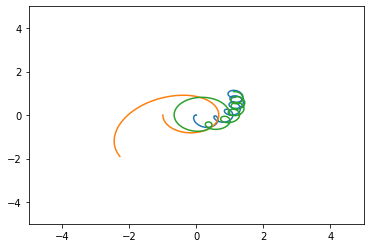

In [16]:
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()